# Laboratorio:
# Comparación de filtros IIR y FIR en el procesamiento de señales de audio

## Objetivo:

El objetivo de este laboratorio es comparar y contrastar los usos de los filtros IIR y FIR en el procesamiento de señales de audio. Se explorarán las características y ventajas de cada tipo de filtro, y se realizarán pruebas prácticas para demostrar su aplicación en el filtrado de señales de audio y en otro ejemplo con una señal de radar.

### Objetivos especificos:

* Comparar la respuesta en frecuencia de los filtros FIR e IIR.
* Evaluar la distorsión introducida por los filtros FIR e IIR.
* Analizar la calidad subjetiva del filtrado de audio por los filtros FIR e IIR.
* Simular señales de radar y agregar ruido.
* Aplicar filtros FIR e IIR para eliminar el ruido.
* Evaluar y comparar la calidad de la detección de objetivos antes y después del procesamiento de señales.

## Requisitos previos:

Conocimientos básicos de procesamiento de señales.
Familiaridad con los conceptos de filtros IIR y FIR.
Entorno de Jupyter Notebook configurado con las bibliotecas necesarias (por ejemplo, scipy, numpy, matplotlib).

## Introducción:

Los filtros IIR (Infinite Impulse Response, respuesta de impulso infinita) y FIR (Finite Impulse Response, respuesta de impulso finita) son ampliamente utilizados en el procesamiento de señales para filtrar y manipular diferentes tipos de señales, incluyendo señales de audio. Los filtros FIR son conocidos por su respuesta de impulso finita y su capacidad para tener una respuesta en frecuencia precisa. Los filtros IIR, por otro lado, pueden tener una respuesta de impulso infinita y son más eficientes en términos de recursos computacionales.

En este laboratorio, vamos a diseñar y aplicar un filtro FIR y un filtro IIR a una señal de audio de muestra. Luego, compararemos los resultados obtenidos en términos de respuesta en frecuencia, distorsión introducida y calidad del filtrado.

### Parte 1: Diseño y aplicación de un filtro FIR
1. Inicialmente se normalizan las frecuencias de corte, y se pasan a rad/s de acuerdo con la expresion: wc = 2π · fc /fs
2. Se realiza el mismo procedimiento para el ancho de banda de transición: BWn = 2π · BW/fs.
3. Una regla práctica para determinar el orden del filtro es dividir 4 por el ancho de banda normalizado y tomar
la parte entera del resultado, asi: M = int(4/BWn).
4. Se implementa la respuesta al impulso del filtro ideal de acuerdo con las siguientes ecuaciones.
En el caso de filtros pasa–altas, pasa-banda y rechaza–banda, adicionalmente se debe truncar la respuesta en el origen, de la siguiente forma. <br>
h1[n==0]=1-(wc)/np.pi # cuando es pasa--altas <br>
h1[n==0]=(wc2-wc1)/np.pi # cuando es pasabanda <br>
h1[n==0]=1-(wc2-wc1)/np.pi # cuando es rechazabanda
5. Para mitigar el fenómeno de Gibbs se utilizan ventanas diferentes a la rectangular, caracterizadas por no tener cambios abruptos en el dominio del tiempo, lo que conduce a lóbulos menores en el dominio de la frecuencia.
Algunas ventanas tı́picas y sus caracterı́sticas se presentan en la siguiente tabla:
6. Luego se multiplica la respuesta del filtro ideal obtenida (hx ), por la ventana escogida (hnew [n] = hx [n]∗win[n]).
7. Finalmente se multiplica la respuesta al impulso por la ganancia que se desea del filtro: hnew = hnew ∗ A, donde A se calcula como A = np.sqrt(10 ∗ ∗(0,1 ∗ Adb )).


1. Comencemos por importar las bibliotecas necesarias:

In [3]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio
from scipy import signal
import matplotlib.pyplot as plt
import scipy.signal as sp
import numpy as np
import librosa

2. A continuación, carguemos una señal de audio de muestra y grafiquémosla:

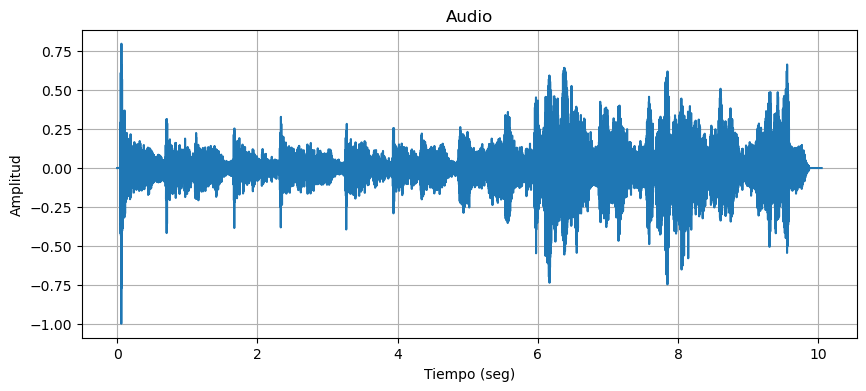

In [6]:
# Cargar la señal de audio de muestra
file_name = 'audio_sample.wav'
fs,x = read(file_name)
Audio(x,rate=fs)

x = x / max(abs(x))
t = np.arange(0,len(x)/fs,1/fs)

# Graficar la señal de audio en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t,x)
plt.title('Audio')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Audio(x,rate=fs)

In [7]:
X = np.fft.fft(x)
X_freq = np.fft.fftfreq(len(x))*fs

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


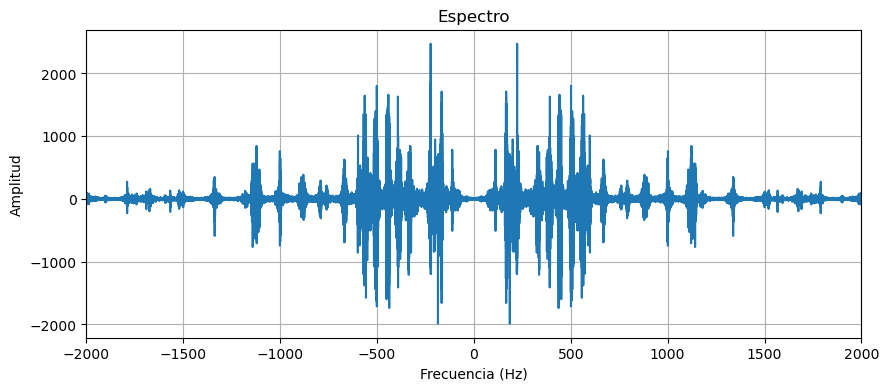

In [8]:
# Grafica del espectro de la señal de audio
plt.figure(figsize=(10, 4))
plt.plot(X_freq,X)
plt.title('Espectro')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim([-2000,2000])
plt.grid()
plt.show()

3. Ahora, diseñemos un filtro FIR utilizando el método de la ventana:

In [9]:
# Especificaciones del filtro FIR
order = 101
cutoff_freq = 500  # Frecuencia de corte del filtro en Hz

# Diseñar el filtro FIR utilizando el método de la ventana
fir_coeff = signal.firwin(order, cutoff_freq, fs=fs, pass_zero='lowpass')

# Aplicar el filtro FIR a la señal de audio
filtered_audio_signal_fir = signal.convolve(x, fir_coeff, mode='same')


4. Veamos el resultado del filtrado aplicado por el filtro FIR:

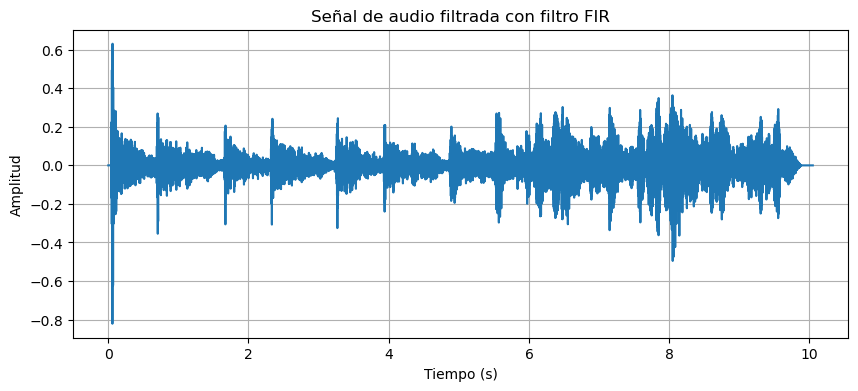

In [10]:
# Graficar la señal de audio filtrada por el filtro FIR
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(filtered_audio_signal_fir)) / fs, filtered_audio_signal_fir)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de audio filtrada con filtro FIR')
plt.grid()
plt.show()

Audio(filtered_audio_signal_fir,rate=fs)

5. Analicemos la respuesta en frecuencia del filtro FIR:

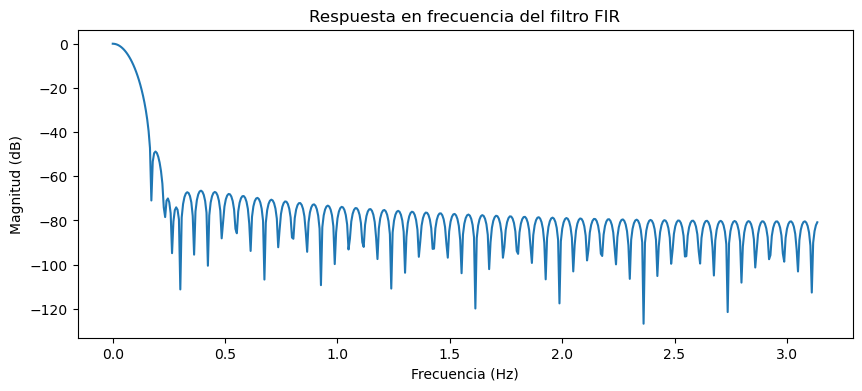

In [11]:
# Calcular la respuesta en frecuencia del filtro FIR
w, h = signal.freqz(fir_coeff)

# Graficar la respuesta en frecuencia del filtro FIR
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia del filtro FIR')
plt.show()


### Parte 2: Diseño y aplicación de un filtro IIR
Un filtro IIR es un tipo de filtro digital en el cual si su entrada es un impulso, la salida será un número ilimitado de términos no nulos, es decir, nunca volverá a un estado de reposo. Para obtener la salida se emplean valores de la entrada actual y anteriores, además se toman valores anteriores de la salida que son almacenados en memoria y
realimentados a la entrada. Su expresión en el dominio discreto es:

y(n) = b0 x(n) + b1 x(n − 1) + . . . + bM x(n − M ) − a1 y(n − 1) − a2 y(n − 2) − . . . − aN y(n − N )
(1)

1. Diseñemos un filtro IIR utilizando el método Butterworth:

In [13]:
# Especificaciones del filtro IIR
order = 4
cutoff_freq = 500  # Frecuencia de corte del filtro en Hz

# Diseñar el filtro IIR utilizando el método Butterworth
b, a = signal.butter(order, cutoff_freq, fs=fs, btype='low', analog=False, output='ba')

# Aplicar el filtro IIR a la señal de audio
filtered_audio_signal_iir = signal.lfilter(b, a, x)


2. Veamos el resultado del filtrado aplicado por el filtro IIR:

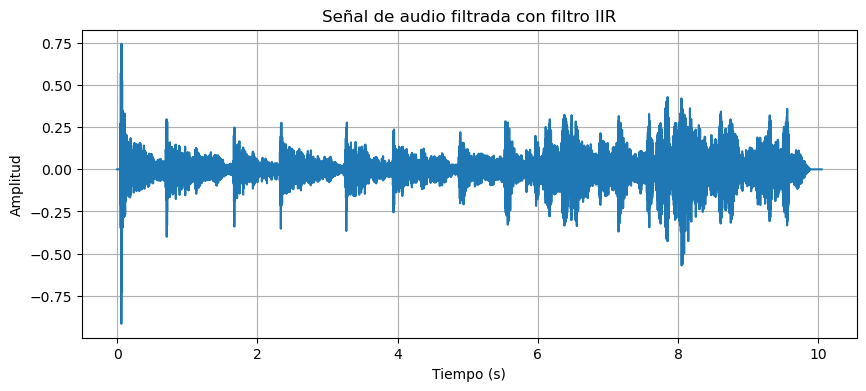

In [14]:
# Graficar la señal de audio filtrada por el filtro IIR
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(filtered_audio_signal_iir)) / fs, filtered_audio_signal_iir)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de audio filtrada con filtro IIR')
plt.grid()
plt.show()

Audio(filtered_audio_signal_iir,rate=fs)

3. Analicemos la respuesta en frecuencia del filtro IIR:

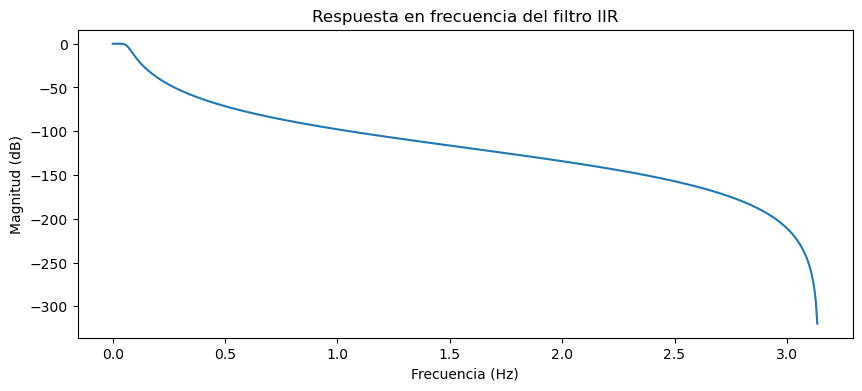

In [15]:
# Calcular la respuesta en frecuencia del filtro IIR
w, h = signal.freqz(b, a)

# Graficar la respuesta en frecuencia del filtro IIR
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia del filtro IIR')
plt.show()


4. Usando subplots grafique la señal antes y después de aplicar un filtro IIR pasa-bajas, pasa-altas, pasa-bandas y rechaza-bandas. Escoja frecuencias de corte que permitan filtrar mı́nimamente la mitad de la señal.


(0.0, 2000.0)

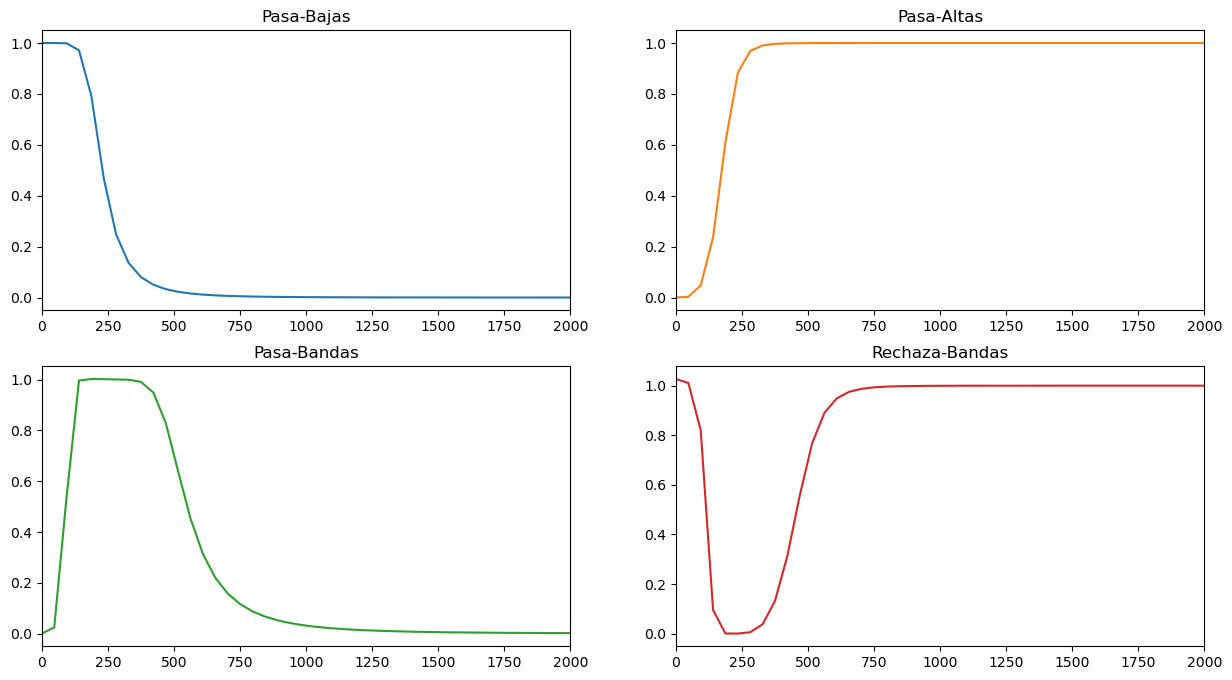

In [16]:
import scipy.signal as sp

nyq_rate = fs/2
Wn = 200/nyq_rate

W_low = 100/nyq_rate
W_high = 500/nyq_rate

orden = 4
b_low, a_low = sp.butter(orden, Wn, btype='lowpass')
wb_low, Hb_low = sp.freqz(b_low, a_low);

b_high, a_high = sp.butter(orden, Wn, btype='highpass')
wb_high, Hb_high = sp.freqz(b_high, a_high);

b_pass, a_pass = sp.butter(orden, [W_low, W_high], btype='bandpass')
wb_pass, Hb_pass = sp.freqz(b_pass, a_pass);

b_stop, a_stop = sp.butter(orden, [W_low, W_high], btype='bandstop')
wb_stop, Hb_stop = sp.freqz(b_stop, a_stop);

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))

ax1.plot((wb_low*fs)/(2*np.pi), np.abs(Hb_low))
ax1.set_title("Pasa-Bajas")
ax1.set_xlim([0,2000])

ax2.plot((wb_high*fs)/(2*np.pi), np.abs(Hb_high), 'tab:orange')
ax2.set_title("Pasa-Altas")
ax2.set_xlim([0,2000])

ax3.plot((wb_pass*fs)/(2*np.pi), np.abs(Hb_pass), 'tab:green')
ax3.set_title("Pasa-Bandas")
ax3.set_xlim([0,2000])

ax4.plot((wb_stop*fs)/(2*np.pi), np.abs(Hb_stop), 'tab:red')
ax4.set_title("Rechaza-Bandas")
ax4.set_xlim([0,2000])

Text(0.5, 1.0, 'Rechaza-Bandas')

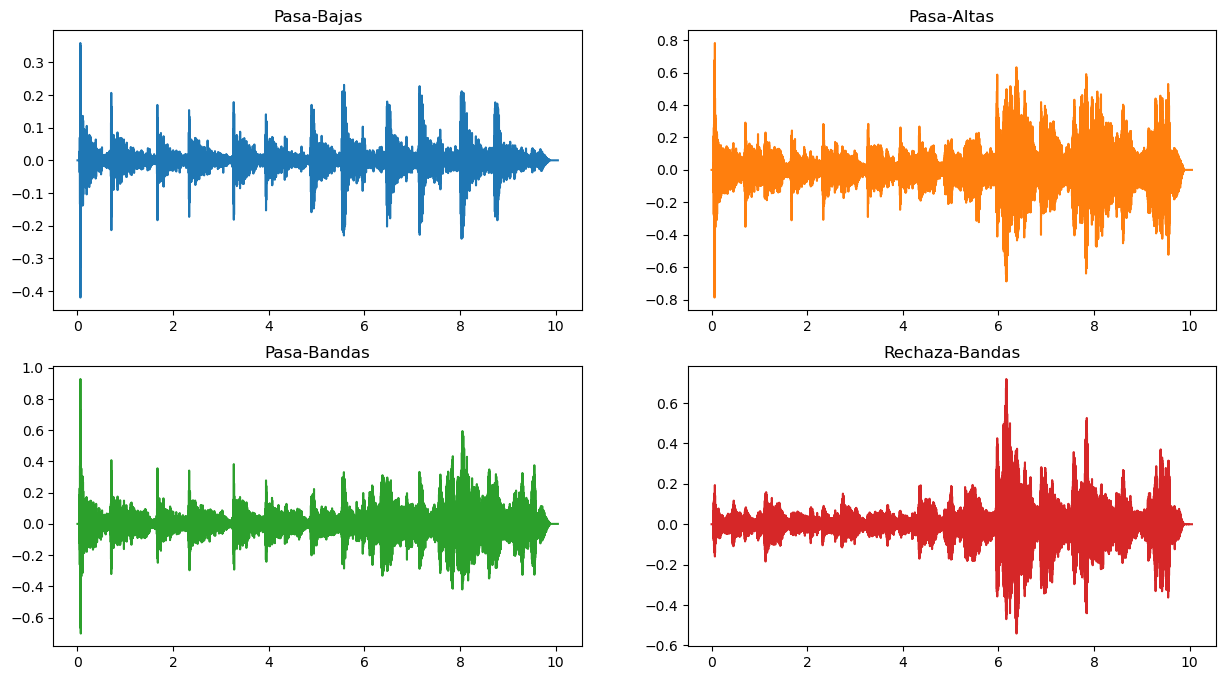

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))

y_low = sp.lfilter(b_low, a_low, x)
ax1.plot(t, y_low)
ax1.set_title("Pasa-Bajas")

y_high = sp.lfilter(b_high, a_high, x)
ax2.plot(t, y_high, 'tab:orange')
ax2.set_title("Pasa-Altas")

y_pass = sp.lfilter(b_pass, a_pass, x)
ax3.plot(t, y_pass, 'tab:green')
ax3.set_title("Pasa-Bandas")

y_stop = sp.lfilter(b_stop, a_stop, x)
ax4.plot(t, y_stop, 'tab:red')
ax4.set_title("Rechaza-Bandas")

(-2000.0, 2000.0)

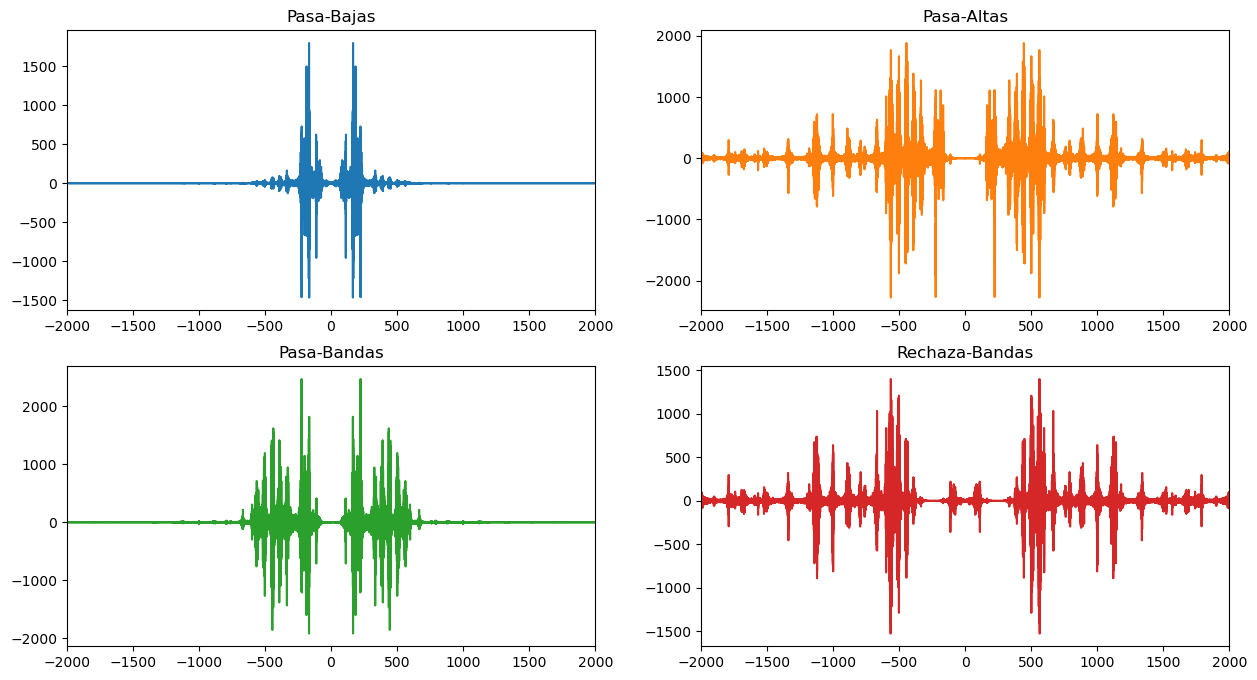

In [20]:
Y_low = np.fft.fft(y_low)
Y_low_freq = np.fft.fftfreq(len(y_low))*fs

Y_high = np.fft.fft(y_high)
Y_high_freq = np.fft.fftfreq(len(y_high))*fs

Y_pass = np.fft.fft(y_pass)
Y_pass_freq = np.fft.fftfreq(len(y_pass))*fs

Y_stop = np.fft.fft(y_stop)
Y_stop_freq = np.fft.fftfreq(len(y_stop))*fs

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))

ax1.plot(Y_low_freq, Y_low)
ax1.set_title("Pasa-Bajas")
ax1.set_xlim([-2000,2000])

ax2.plot(Y_high_freq, Y_high, 'tab:orange')
ax2.set_title("Pasa-Altas")
ax2.set_xlim([-2000,2000])

ax3.plot(Y_pass_freq, Y_pass, 'tab:green')
ax3.set_title("Pasa-Bandas")
ax3.set_xlim([-2000,2000])

ax4.plot(Y_stop_freq, Y_stop, 'tab:red')
ax4.set_title("Rechaza-Bandas")
ax4.set_xlim([-2000,2000])

In [21]:
print("Audio con pasa bajas")
Audio(y_low,rate=fs)

Audio con pasa bajas


In [22]:
print("Audio con pasa altas")
Audio(y_high,rate=fs)

Audio con pasa altas


In [23]:
print("Audio con pasa bandas")
Audio(y_pass,rate=fs)

Audio con pasa bandas


In [24]:
print("Audio con rechaza bandas")
Audio(y_stop,rate=fs)

Audio con rechaza bandas


Nos damos cuenta, que al pasar el audio por los filtros, encontramos que se logran identificar diferentes instrumentos, como tambien, diferentes formas de onda, a nivel del espectro, se evidencia los cortes que hacen los filtros.

### Parte 3: Comparación y discusión de los resultados
Comparemos los resultados obtenidos en las partes 1 y 2 en términos de respuesta en frecuencia y calidad del filtrado.


- Respuesta en frecuencia:

Ambos filtros FIR e IIR pueden ofrecer respuestas en frecuencia adecuadas para diferentes aplicaciones de procesamiento de señales de audio. Sin embargo, es posible observar diferencias en las características de atenuación y respuesta de frecuencia entre los filtros. Los filtros FIR pueden proporcionar una respuesta en frecuencia más precisa y controlada, lo que puede ser beneficioso en aplicaciones que requieren una manipulación precisa del contenido de audio.

- Calidad del filtrado:

La calidad del filtrado es un aspecto subjetivo y puede depender de la aplicación y las preferencias personales.
Al evaluar la calidad del filtrado de audio, es importante considerar la claridad de la señal, la presencia de artefactos o distorsiones audibles y la fidelidad en comparación con la señal original. Los filtros FIR pueden ofrecer una mayor transparencia y preservación de la señal original, especialmente cuando se diseñan con una respuesta en fase lineal. Los filtros IIR, por otro lado, pueden introducir ciertos cambios en la señal debido a su naturaleza recursiva y realimentación.

3.2. Discutamos las ventajas y desventajas de los filtros FIR e IIR en el contexto del procesamiento de señales de audio.

Los filtros FIR tienen varias ventajas sobre los filtros IIR. Por ejemplo, son inherentemente estables y tienen una respuesta en fase lineal. Además, permiten un control preciso sobre la respuesta de frecuencia deseada. Sin embargo, los filtros FIR también tienen algunas desventajas, como un mayor orden y un mayor retardo.

Por otro lado, los filtros IIR tienen una orden más baja y son más eficientes computacionalmente. Sin embargo, pueden ser inestables si no se diseñan adecuadamente y pueden introducir distorsión de fase en la señal de audio.

3.3. Destaquemos las aplicaciones prácticas en las que cada tipo de filtro puede ser más adecuado.

Aplicaciones de los filtros FIR Los filtros FIR se utilizan para implementar casi cualquier tipo de respuesta de frecuencia digital, con una alta precisión y una fase lineal2. Algunas de sus aplicaciones son:
* Procesamiento de audio de alta calidad: Los filtros FIR permiten una manipulación precisa del contenido de audio sin introducir distorsión no deseada1.
* Cancelación de eco: Los filtros FIR son eficaces para cancelar el eco en aplicaciones de comunicación o telefonía, mejorando la calidad de la comunicación1.
* Ecualización de audio: Los filtros FIR permiten un control preciso sobre la respuesta de frecuencia, realzando o atenuando ciertas bandas de frecuencia y ajustando el timbre o la respuesta tonal de la señal de audio1.

Aplicaciones de los filtros IIR Los filtros IIR son eficientes computacionalmente y se utilizan comúnmente en aplicaciones de audio en tiempo real, con un menor orden y un menor retardo2. Algunas de sus aplicaciones son:
* Procesamiento de audio en tiempo real: Los filtros IIR se utilizan en sistemas de sonido en vivo, procesamiento de voz en tiempo real y aplicaciones de audio en dispositivos móviles1.
* Filtros de audio estándar: Muchos filtros de audio estándar, como los filtros de paso bajo, paso alto o paso de banda, se pueden implementar eficientemente utilizando filtros IIR1.
* Análisis espectral: Los filtros IIR son útiles en aplicaciones que implican análisis espectral, como la detección de frecuencias específicas en una señal de audio1.

### Parte 3: Aplicacion: procesar una señal de radar para detección de objetivos

Simular la detección de objetivos en un sistema de radar y aplicar filtros FIR e IIR para eliminar el ruido y mejorar la detección de los objetivos

1. Generar señal de radar:

In [25]:
def generate_radar_signal(time, target_amplitude, target_range, target_speed, radar_frequency, noise_amplitude):
    # Genera una señal de radar simulada con un objetivo
    carrier = np.cos(2 * np.pi * radar_frequency * time)
    target = target_amplitude * np.exp(1j * (4 * np.pi * target_range / radar_frequency - 2 * np.pi * target_speed * time))
    noise = noise_amplitude * np.random.randn(len(time))
    return carrier * (target + noise)

2. Agregar ruido a la señal de radar

In [26]:
def add_noise(signal, noise_amplitude):
    # Agrega ruido a una señal
    noise = noise_amplitude * np.random.randn(len(signal))
    return signal + noise


3. Aplicar filtro FIR

In [27]:
def apply_fir_filter(signal, filter_order, cutoff_frequency):
    # Aplica un filtro FIR a una señal
    filter_coeff = sp.firwin(filter_order, cutoff_frequency)
    filtered_signal = sp.lfilter(filter_coeff, 1, signal)
    return filtered_signal


4. Aplicar filtro IIR

In [28]:
def apply_iir_filter(signal, filter_order, cutoff_frequency):
    # Aplica un filtro IIR a una señal
    filter_coeff = sp.iirfilter(filter_order, cutoff_frequency, btype='lowpass', analog=False, ftype='butter')
    filtered_signal = sp.lfilter(filter_coeff[0], filter_coeff[1], signal)
    return filtered_signal

5. Visualizar resultados

In [29]:
def plot_signals(signal,noisy_radar_signal):
    # Grafica las señales de radar original y filtradas
    plt.figure(figsize=(10, 3))
    plt.plot(time, np.abs(signal), label='Señal de Radar Original')
    plt.plot(time, np.abs(noisy_radar_signal), label='Señal con ruido')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
def plot_signals1(signal, filtered_signal_fir, filtered_signal_iir):
    # Grafica las señales de radar original y filtradas
    plt.figure(figsize=(10, 3))
    plt.plot(time, np.abs(signal), label='Señal de Radar Original')
    plt.plot(time, np.abs(filtered_signal_fir), label='Señal de Radar Filtrada (FIR)')
    plt.plot(time, np.abs(filtered_signal_iir), label='Señal de Radar Filtrada (IIR)')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()

6. Unir las funciones antes calculadas

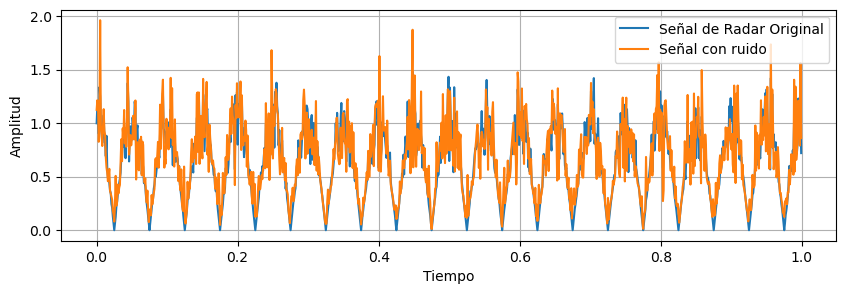

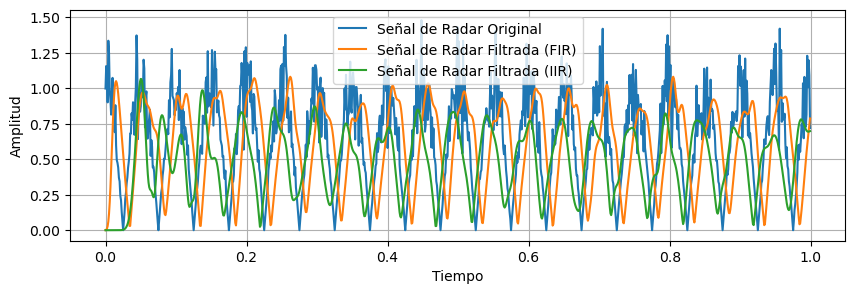

In [32]:
# Parámetros de simulación
sampling_rate = 1000  # Tasa de muestreo en Hz
time = np.arange(0, 1, 1/sampling_rate)  # Vector de tiempo

# Genera la señal de radar simulada
target_amplitude = 1.0
target_range = 100.0
target_speed = 10.0
radar_frequency = 10.0
noise_amplitude = 0.2
radar_signal = generate_radar_signal(time, target_amplitude, target_range, target_speed, radar_frequency, noise_amplitude)

# Agrega ruido a la señal de radar
noisy_radar_signal = add_noise(radar_signal, noise_amplitude)

# Aplica filtros FIR e IIR
filter_order = 20
cutoff_frequency = 0.1

filtered_radar_signal_fir = apply_fir_filter(noisy_radar_signal, filter_order, cutoff_frequency)
filtered_radar_signal_iir = apply_iir_filter(noisy_radar_signal, filter_order, cutoff_frequency)

# Visualiza los resultados
plot_signals(radar_signal,noisy_radar_signal)
plot_signals1(radar_signal, filtered_radar_signal_fir, filtered_radar_signal_iir)


(-60.0, 60.0)

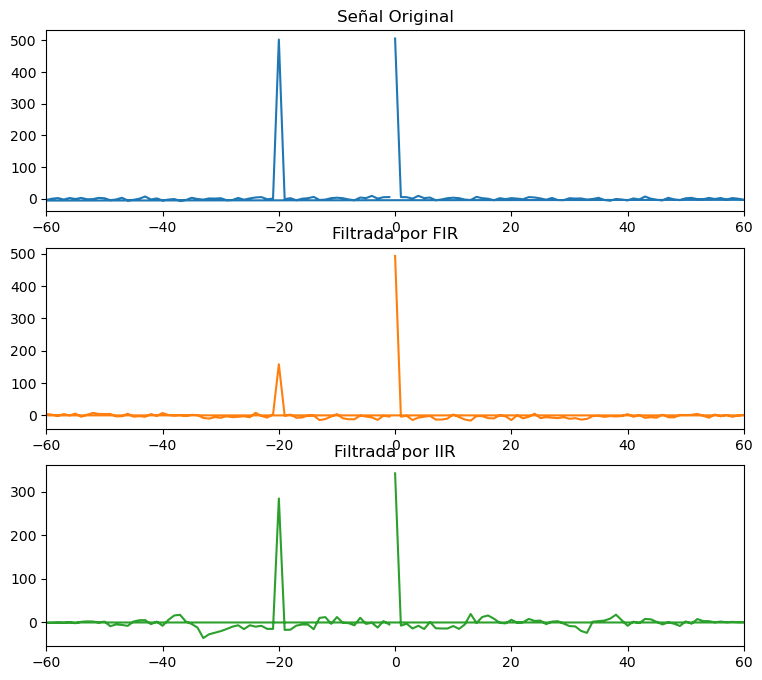

In [33]:
Radar_Signal = np.fft.fft(radar_signal)
Radar_Signal_freq = np.fft.fftfreq(len(radar_signal))*sampling_rate

Filtered_Radar_signal_fir = np.fft.fft(filtered_radar_signal_fir)
Filtered_Radar_signal_fir_freq = np.fft.fftfreq(len(filtered_radar_signal_fir))*sampling_rate

Filtered_Radar_signal_iir = np.fft.fft(filtered_radar_signal_iir)
Filtered_Radar_signal_iir_freq = np.fft.fftfreq(len(filtered_radar_signal_iir))*sampling_rate

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (9,8))

xlim = 60

ax1.plot(Radar_Signal_freq, Radar_Signal)
ax1.set_title("Señal Original")
ax1.set_xlim([-xlim,xlim])

ax2.plot(Filtered_Radar_signal_fir_freq, Filtered_Radar_signal_fir, 'tab:orange')
ax2.set_title("Filtrada por FIR")
ax2.set_xlim([-xlim,xlim])

ax3.plot(Filtered_Radar_signal_iir_freq, Filtered_Radar_signal_iir, 'tab:green')
ax3.set_title("Filtrada por IIR")
ax3.set_xlim([-xlim,xlim])

En esta aplicacón, encontramos que el filtro FIR, logra suprimir mejor el ruido y tiene mayor respuesta en frecuencia, por el contrario el filtro IRR tiene mayor ruido, debido a que presentan distorcion de fase.


## Conclusiones:
* Los filtros FIR e IIR son herramientas poderosas en el procesamiento de señales de audio.
* Los filtros FIR son conocidos por su respuesta de impulso finita y su capacidad para tener una respuesta en frecuencia precisa. Son ideales para aplicaciones que requieren una respuesta en frecuencia nítida y una distorsión mínima.
* Los filtros IIR son más eficientes en términos de recursos computacionales y pueden lograr resultados similares con una menor cantidad de coeficientes. Son útiles cuando se necesita una respuesta en frecuencia compleja o cuando se trabaja con sistemas en tiempo real.
* La elección entre filtros FIR e IIR dependerá de las necesidades y restricciones específicas de la aplicación.
* En general, los filtros FIR son más fáciles de diseñar y entender, mientras que los filtros IIR son más flexibles y eficientes computacionalmente.
* El filtro FIR proporciona una respuesta de fase lineal y mayor estabilidad, lo que resulta beneficioso para mejorar la precisión en la detección de objetivos en el sistema de radar.
* El filtro IIR puede lograr una mayor eficiencia en términos de orden y coeficientes, lo que lo hace útil en aplicaciones de radar donde se busca un procesamiento más rápido de las señales.